# **Biblioteki**

In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings
import pingouin as pn
from scipy.stats import combine_pvalues
import mvShapiroTest
from mvShapiroTest import test



# **Wczytanie danych**

In [5]:
# Wczytanie danych

df = pd.read_csv('Lab1/egzaminy.csv')
df

,Matematyka,Angielski,Fizyka,Geografia,Biologia,Chemia
0,3.761200,3.784190,4.007333,4.077537,3.850148,4.094345
1,3.850148,3.988984,4.060443,3.988984,4.007333,4.043051
2,3.761200,4.077537,4.043051,4.043051,4.007333,3.761200
3,3.828641,4.025352,3.891820,3.988984,3.931826,3.871201
4,4.094345,3.951244,3.688879,4.060443,4.025352,3.988984
...,...,...,...,...,...,...
995,4.060443,3.850148,4.077537,4.219508,4.007333,4.043051
996,3.871201,3.871201,3.951244,4.174387,3.850148,3.871201
997,3.891820,3.891820,4.127134,3.931826,3.931826,4.060443
998,3.891820,3.931826,3.931826,4.158883,4.094345,4.025352


# **Wielowymiarowy rozkład normalny**

Testy normalności wielowymiarowej pozwalają na sprawdzenie czy rozkład przynajmniej 2 zmiennych ma wielowymiarowy rozkład normalny.

**Najbardziej znanymi testami wielowymiarowymi są:**

1) Test Mardia

2) Test Jarque - Bera

3) Test Harusz - Tarasińska

4) Test Henze - Zinkler

5) Test Shapiro - Wilka


**W Pythonie mamy dwie możliwości testowania normalności rozkładów wielowymiarowych:**

1) **Test Henze - Zinkler**

Jest to jeden z najśilniejszych testów normalności rozkładów wielowymiarowych. Jest skuteczny dla dowolnego wymiaru i wielkości próby.

https://pingouin-stats.org/build/html/generated/pingouin.multivariate_normality.html

pn.multivariate_normality(dane, alpha = alfa)

2) **Test Shapiro - Wilka**

Pakiet ten zawiera testy opracowane do testowania dopasowania wielowymiarowych rozkładów normalnych i wielowymiarowych rozkładów skośno-normalnych, dla nieznanych poarametrów.

https://libraries.io/pypi/mvShapiroTest

test.mvshapiro(dane)




**Rozkład normalny dwupoziomowy**

Wykorzystując obie metody sprawdzimy czy rozkład zmiennych: Matematyka i Fizyka może zostać opisany wielowymiarowym rozkładem normalnym.

alfa = 0.05

**Proszę skomentować wyniki.**


**H0 :** Zmienne mają wielowymiarowy rozkład normalny.

**H1:**  Zmienne nie mają wielowymiarowego rozkładu normalnego.

In [6]:
pn.multivariate_normality(df[['Matematyka', 'Fizyka']], alpha=.05)

HZResults(hz=1.2544023281707144, pval=0.023765017394352012, normal=False)

In [7]:
test.mvshapiro(df[['Matematyka', 'Fizyka']])

{'statistic': 0.99174055,
 'p_value': 2e-08,
 'Method': 'Generalized Shapiro-Wilk test for Multivariate Normality'}

**ODP.**

**Narysowanie histogrmu**

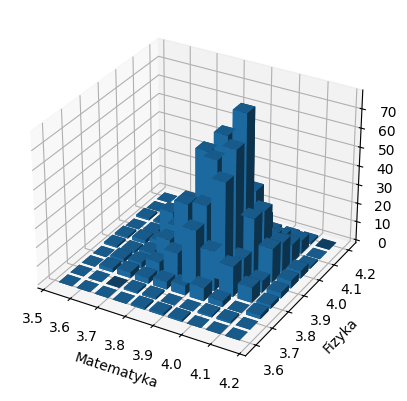

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = df['Matematyka']
y = df['Fizyka']
hist, xedges, yedges = np.histogram2d(x, y, bins = 10)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# 0.05 - rozmiar słupków
dx = dy = 0.05 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('Matematyka')
ax.set_ylabel('Fizyka')

plt.show()

**Zadanie:**

Wykorzystując obie metody, proszę sprawdzić czy rozkład zmiennych: Fizyka i Chemia może zostać opisany wielowymiarowym rozkładem normalnym. Na końcu proszę narysować histogram.

alfa = 0.05


**Hipotezy:**

**H0:**

**H1:**

In [15]:
# Rozwiązanie